## Unsupervised Machine Learning Clustering

### Table of Contents:
    1. Import libraries and data
    2. Data cleaning
    3. Elbow technique
    4. k-means clustering

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
%matplotlib inline

In [4]:
# Define path

path = r'/Users/jodikim/02_2023_Death_Penalty_Analysis'

In [5]:
# Import data for project

df = pd.read_csv(r'/Users/jodikim/02_2023_Death_Penalty_Analysis/02_Data/Prepared_Data/us_executions_cleaned.csv', index_col = False)

### 2. Data cleaning

In [6]:
df.shape

(1561, 25)

In [7]:
df.head()

,Unnamed: 0,id,execution_volunteer,number_victims,juvenile,race,sex,region,country,state,...,asian_male_victims,native_amer_male_victims,other_race_male_victims,white_female_victims,black_female_victims,latino_female_victims,asian_female_victims,amerind_nativealask_female_victims,other_race_female_victims,victims_races
0,0,1,yes,1,no,White,Male,West,United States,Utah,...,0,0,0,0,0,0,0,0,0,White
1,1,2,no,1,no,White,Male,South,United States,Florida,...,0,0,0,0,0,0,0,0,0,White
2,2,3,yes,1,no,White,Male,West,United States,Nevada,...,0,0,0,0,0,0,0,0,0,White
3,3,4,yes,4,no,White,Male,Midwest,United States,Indiana,...,0,0,0,2,0,0,0,0,0,White
4,4,5,yes,1,no,White,Male,South,United States,Virginia,...,0,0,0,0,0,0,0,0,0,White


In [8]:
# Dropping column 'unnamed'

df = df.drop(columns = ['Unnamed: 0'])

#### Not necessary to rename columns for this test 

In [24]:
# Creating subset with only numerical variables for this test

df_1 = df[['id', 'number_victims', 'white_male_victims', 'black_male_victims', 'latino_male_victims','asian_male_victims', 'native_amer_male_victims', 'other_race_male_victims', 'white_female_victims', 'black_female_victims', 'latino_female_victims', 'asian_female_victims', 'amerind_nativealask_female_victims', 'other_race_female_victims']]

### 3. The elbow technique

In [25]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [26]:
score = [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))] 

In [27]:
score

[-316980855.48878944,
 -79248350.792805,
 -35224044.37605168,
 -19815951.57645125,
 -12684434.834985942,
 -8810443.795711774,
 -6478305.070105851,
 -4959481.7127833925,
 -3919424.8781444742]

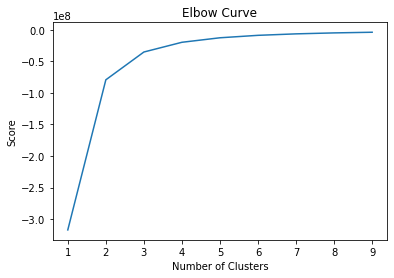

In [28]:
# Plotting elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### This curve goes from 2 to 3 and then levels out at 4. Let's go with 4 for number of clusters.

### 4. k-means clustering

In [45]:
# Creating a k-means object

kmeans = KMeans(n_clusters = 4)

In [46]:
# Fitting the k-means object to the data

kmeans.fit(df_1)

KMeans(n_clusters=4)

In [31]:
df_1['clusters'] = kmeans.fit_predict(df_1)

/var/folders/3t/llwblv5j2gl9m5qb95ff9hk00000gn/T/ipykernel_36852/2087946470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['clusters'] = kmeans.fit_predict(df_1)


In [47]:
df_1.head()

,id,number_victims,white_male_victims,black_male_victims,latino_male_victims,asian_male_victims,native_amer_male_victims,other_race_male_victims,white_female_victims,black_female_victims,latino_female_victims,asian_female_victims,amerind_nativealask_female_victims,other_race_female_victims,clusters
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,4,4,2,0,0,0,0,0,2,0,0,0,0,0,1
4,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
df_1['clusters'].value_counts()

0    521
1    520
2    520
Name: clusters, dtype: int64

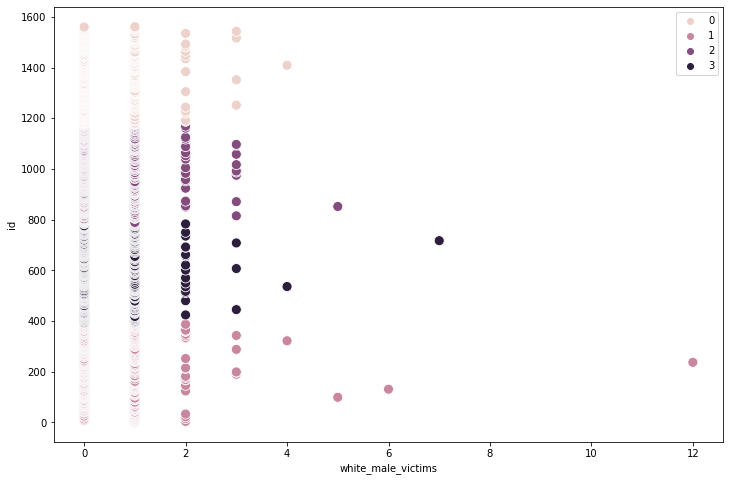

In [49]:
# Plotting the clusters for the "id" and "white male victims" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['white_male_victims'], y=df['id'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('white_male_victims') 
plt.ylabel('id') 
plt.show()

In [52]:
df_1.groupby('clusters').agg({'white_male_victims':['mean', 'median'],
                            'id':['mean', 'median']})

white_male_victims             id        
                       mean median    mean  median
clusters                                          
0                  0.485605    0.0  1301.0  1301.0
1                  0.603846    0.0   260.5   260.5
2                  0.519231    0.0   780.5   780.5

In [35]:
# Creating a new subset without 'id' column for this test

df_2 = df[['number_victims', 'white_male_victims', 'black_male_victims', 'latino_male_victims','asian_male_victims', 'native_amer_male_victims', 'other_race_male_victims', 'white_female_victims', 'black_female_victims', 'latino_female_victims', 'asian_female_victims', 'amerind_nativealask_female_victims', 'other_race_female_victims']]

In [36]:
# Elbow technique

num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [38]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] 

In [39]:
score

[-4195.488789237668,
 -3007.152230845895,
 -2513.2102069430443,
 -2166.110771927896,
 -1876.5541122884806,
 -1612.2639781736552,
 -1442.226428662315,
 -1267.9447173259439,
 -1161.7699831899502]

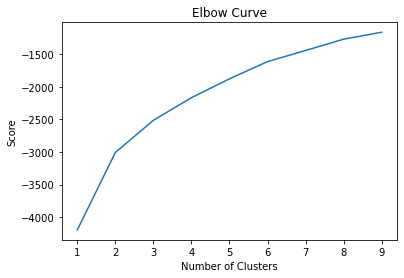

In [40]:
# Plotting elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [41]:
# Creating a k-means object with 8 for the number of clusters as the curve seems to level out a bit at 8.

kmeans = KMeans(n_clusters = 8)

In [42]:
# Fitting the k-means object to the data

kmeans.fit(df_2)

KMeans()

In [43]:
df_2['clusters'] = kmeans.fit_predict(df_2)

/var/folders/3t/llwblv5j2gl9m5qb95ff9hk00000gn/T/ipykernel_36852/1948498210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


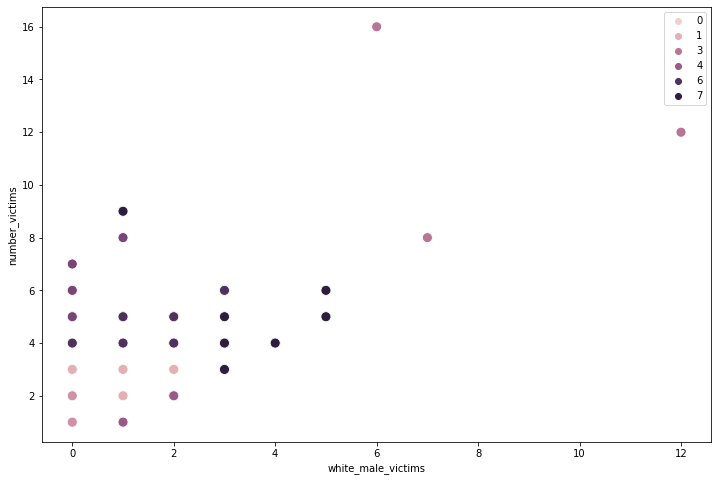

In [44]:
# Plotting the clusters for the "white_male_victims" and "number victims" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['white_male_victims'], y=df['number_victims'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('white_male_victims') 
plt.ylabel('number_victims') 
plt.show()

#### As you noted in the previous exercise and with this one, the dataset I chose unfortunately does not lend itself well to these kinds of tests. Thanks for your advice and alternative things to try. I still wanted to go through the steps with the variables that I have just to see what kind of results it may yield. 